In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'xtick.direction': 'out', 'axes.spines.top': False, 'axes.spines.right': False})

df1 = pd.read_csv('dataverse_files/main_data.tab', sep="\t")
df1 = df1.dropna(axis=0, subset='time')
df1.filter(regex='\w*host\w*')

,hostcity,hostcitynum,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,matched_allhosts
59,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
60,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
61,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
62,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
63,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
133635,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
133636,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
133637,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
133638,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [2]:
s1_3_1 = df1[[ 'repression', 'lnrepression', 'dumrepression', 'hostcity', 'prox_hotelonly', 'prox_hotelpress', 
    'time', 'time2', 'time3', 'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',  
    'lnrepression70_77', 'latitude', 'lnstrikes', 'lnlag_strikes', 'lnlag2_strikes', 
    'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]


s1_3_1 = s1_3_1.rename(
    columns={
        'repression': '$Repression \ Events$',
        'lnrepression': '$Repression \ Events^a$',
        'dumrepression': '$Repression \ Events$',
        'hostcity': '$Host \ City$',
        'prox_hotelonly': '$Proximity \ to \ Hotel$',
        'prox_hotelpress': '$Proximity \ to \ Journalist \ Venue$',
        'time': '$Time$',
        'time2': '$Time^2$',
        'time3': '$Time^3$',
        'lnpop_1970': '$Population \ Size^a$',
        'literacy_avg': '$Literacy \ Rate$',
        'vote_frejuli': '$Peronist \ Vote \ Share$',
        'lnrebact1974': '$Rebel \ Activity^a$',
        'lnrepression70_77': '$Past \ Repression^a$',
        'latitude': '$Latitude$',
        'lnstrikes': '$Protest_{Current \ month}^a$',
        'lnlag_strikes': '$Protest_{One \ Month \ ago}^a$',
        'lnlag2_strikes': '$Protest_{Two \ Months \ ago}^a$',
        'zone1': '$Military \ Zone \ 1$',
        'zone2': '$Military \ Zone \ 2$',
        'zone3': '$Military \ Zone \ 3$',
        'zone4': '$Military \ Zone \ 4$',
        'zone5': '$Military \ Zone \ 5$',
        
    }
)

s1_3_1 = s1_3_1.describe().T.drop(columns=['25%', '50%', '75%'], errors='ignore')
s1_3_1 = s1_3_1.astype({
    'count': 'int',
})
for col in ['mean', 'std', 'min', 'max']:
    s1_3_1[col] = s1_3_1[col].map('{:,.3f}'.format)

s1_3_1 = s1_3_1.rename(columns={
    'count': 'Obs.',
    'mean': 'Mean',
    'std': 'Std. dev.',
    'min': 'Min.',
    'max': 'Max.'
})

types = [
    'Count', 'Continuous', 'Binary', 'Binary', 'Continuous', 'Continuous',
    'Count', 'Count', 'Count', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
]

s1_3_1.insert(0, 'Type', types)
s1_3_1

,Type,Obs.,Mean,Std. dev.,Min.,Max.
$Repression \ Events$,Count,58107,0.005,0.104,0.000,7.000
$Repression \ Events^a$,Continuous,58107,0.003,0.053,0.000,2.079
$Repression \ Events$,Binary,58107,0.003,0.058,0.000,1.000
$Host \ City$,Binary,58383,0.010,0.100,0.000,1.000
$Proximity \ to \ Hotel$,Continuous,58107,7.000,1.613,0.000,9.398
$Proximity \ to \ Journalist \ Venue$,Continuous,58107,7.079,1.629,0.000,9.398
$Time$,Count,58383,0.590,0.338,0.010,1.170
$Time^2$,Count,58383,0.462,0.411,0.000,1.369
$Time^3$,Count,58383,0.407,0.460,0.000,1.602
$Population \ Size^a$,Continuous,56628,9.701,1.336,6.057,14.905


In [3]:
df2 = pd.read_csv('dataverse_files/figure_1_data.tab', sep="\t")
df2

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


In [4]:
df2.insert(0, 'Years', ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2014-2019', '2020-2024'])


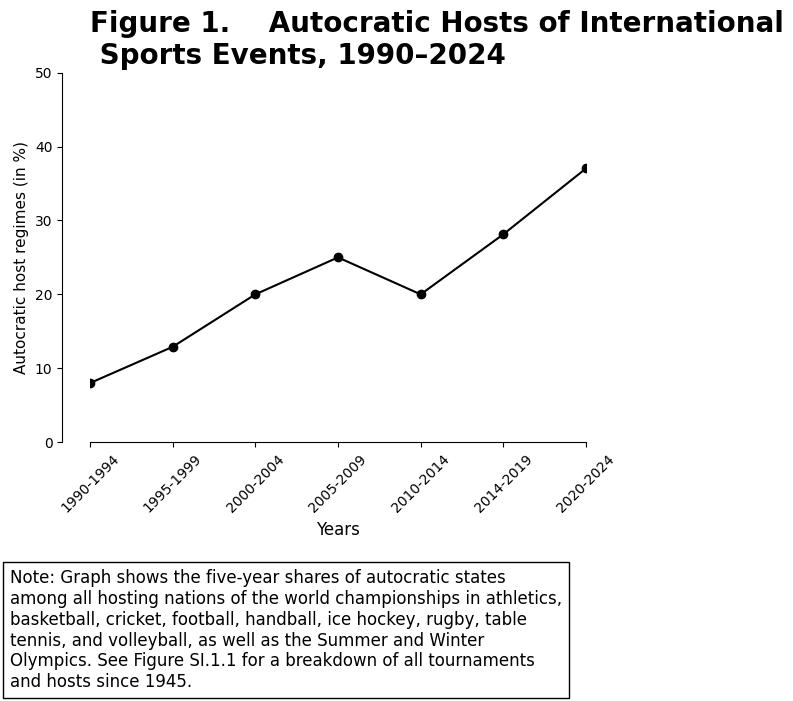

In [5]:
fig, ax = plt.subplots()


plt.xticks(rotation=45)


plt.xlim((0, 6))
plt.ylim(0, 50)

plt.xlabel('Years', fontsize=12) 
plt.ylabel('Autocratic host regimes (in %)', fontsize=11)

plt.title('Figure 1.    Autocratic Hosts of International\n Sports Events, 1990–2024', fontsize=20, loc='left',\
         fontweight="bold")
plt.figtext(0.0, -0.4, \
"Note: Graph shows the five-year shares of autocratic states\n\
among all hosting nations of the world championships in athletics,\n\
basketball, cricket, football, handball, ice hockey, rugby, table \n\
tennis, and volleyball, as well as the Summer and Winter\n\
Olympics. See Figure SI.1.1 for a breakdown of all tournaments\n\
and hosts since 1945.", ha="left", fontsize=12, bbox={"facecolor":"white", "pad":5})

# plt.rcParams.update({'xtick.direction': 'out', 'axes.spines.top': False, 'axes.spines.right': False})

ax.plot( df2['Years'], df2['autochostperc'], marker='o', c='black')
ax.spines['left'].set_position(('outward', 20))

In [6]:
df3 = pd.read_csv('dataverse_files/figure_SI11_data.tab', sep="\t")
df3

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


In [7]:
df3 = df3.fillna(0)
df3

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,0.0
1,1987.0,0.0,2.5,3.0,0.0
2,1991.0,0.0,2.5,3.0,0.0
3,1991.0,0.0,2.5,3.0,0.0
4,1995.0,1.0,2.5,0.0,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,0.0
329,2014.0,0.0,27.5,28.0,0.0
330,2018.0,0.0,27.5,28.0,0.0
331,2018.0,0.0,27.5,28.0,0.0


In [8]:
df3['DA'] = np.where(df3['democ'] != 0.0, df3['democ'], df3['autoc'])
df3 = df3.loc[df3['DA'] != 0.0]
df3

,year,regime,baseline,democ,autoc,DA
0,1987.0,0.0,2.5,3.0,0.0,3.0
1,1987.0,0.0,2.5,3.0,0.0,3.0
2,1991.0,0.0,2.5,3.0,0.0,3.0
3,1991.0,0.0,2.5,3.0,0.0,3.0
4,1995.0,1.0,2.5,0.0,2.0,2.0
...,...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,0.0,28.0
329,2014.0,0.0,27.5,28.0,0.0,28.0
330,2018.0,0.0,27.5,28.0,0.0,28.0
331,2018.0,0.0,27.5,28.0,0.0,28.0


In [24]:
df3

,year,regime,baseline,democ,autoc,DA
0,1987.0,0.0,2.5,3.0,0.0,3.0
1,1987.0,0.0,2.5,3.0,0.0,3.0
2,1991.0,0.0,2.5,3.0,0.0,3.0
3,1991.0,0.0,2.5,3.0,0.0,3.0
4,1995.0,1.0,2.5,0.0,2.0,2.0
...,...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,0.0,28.0
329,2014.0,0.0,27.5,28.0,0.0,28.0
330,2018.0,0.0,27.5,28.0,0.0,28.0
331,2018.0,0.0,27.5,28.0,0.0,28.0


In [18]:
# Disable top and right spine
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False, 'axes.xmargin': 0.0})

(1.0, 29.0)

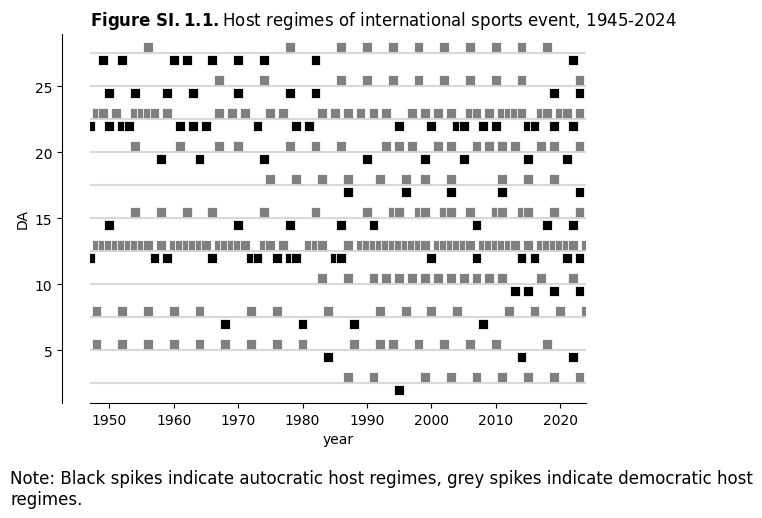

In [57]:
ax = sns.scatterplot(data=df3, x='year', y='DA', marker='s', hue='regime', palette=['#808080', '#000000'], \
                 s=50, legend=False)

for y in set(df3['baseline'].values):
    ax.axhline(y, c='#808080', alpha=0.3)

ax.spines['left'].set_position(('outward', 20))  

plt.title(r'$\bf{Figure \ SI.1.1.}$' +  'Host regimes of international sports event, 1945-2024', loc='left')

plt.figtext(0.0, -0.1, \
"Note: Black spikes indicate autocratic host regimes, grey spikes indicate democratic host\n\
regimes." , ha="left", fontsize=12)

plt.ylabel('')

plt.xticks([tick for tick in range(1950, 2023, 10)])

plt.ylim((df3.DA.min() - 1, df3.DA.max() + 1))